# Breast Cancer Data Set

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn                  import metrics
from sklearn.model_selection  import train_test_split
from sklearn.linear_model     import LogisticRegression
from sklearn.tree             import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes      import GaussianNB
from sklearn.model_selection  import GridSearchCV
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.ensemble         import RandomForestClassifier
from imblearn.over_sampling   import RandomOverSampler

### Importing Data

In [3]:
data=pd.read_csv("breast-cancer.data")

In [4]:
data.head()
#data has no column name

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [5]:

#copied the column name and assigning each column with a name
data.columns=['Class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']
data.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


### Preprocessing

In [6]:
#checking data type and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumor_size   285 non-null    object
 4   inv_nodes    285 non-null    object
 5   node_caps    285 non-null    object
 6   deg_malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast_quad  285 non-null    object
 9   irradiat     285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


- As we can observed from the data that Age,tumor_size and inv_nodes should be numeric.
- Class is our target variable.
- ALl cplumns except age, tumor_size and inv_nodes are of categorical type.

In [7]:
#Checking unique values of all columns
for x in data.columns[1:]:
    print(x,data[x].unique())

age ['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
menopause ['premeno' 'ge40' 'lt40']
tumor_size ['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
inv_nodes ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node_caps ['no' 'yes' '?']
deg_malig [2 1 3]
breast ['right' 'left']
breast_quad ['right_up' 'left_low' 'left_up' 'right_low' 'central' '?']
irradiat ['no' 'yes']


- age, tumor_size and inv_nodes have numbers but have dash(-) between them
- node_cap have some values with '?' likely its a Missing Value

In [8]:
#Checking node_caps with '?'
data[(data.node_caps=='?')]

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
144,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
162,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
182,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
232,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
262,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


<AxesSubplot:>

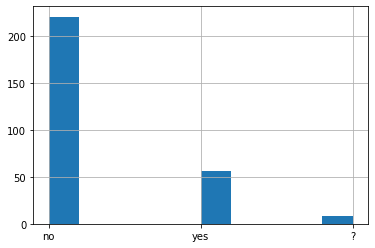

In [9]:
data.node_caps.hist() #checking counts

In [10]:
#As 'no' values are high so replacing '?' with 'no' and checking them.
data.node_caps.replace('?','no',inplace=True)
data[(data.node_caps=='?')]

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat


In [11]:
#making a list of columns names with numeric values but of object type.
x=['age','tumor_size','inv_nodes']
for i in x:
    data[i]=data[i].str.split('-').apply(lambda x:(int(x[0])+int(x[1]))/2) #formatting them and taking the average

In [12]:
data.head()    


,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,44.5,premeno,22.0,1.0,no,2,right,right_up,no
1,no-recurrence-events,44.5,premeno,22.0,1.0,no,2,left,left_low,no
2,no-recurrence-events,64.5,ge40,17.0,1.0,no,2,right,left_up,no
3,no-recurrence-events,44.5,premeno,2.0,1.0,no,2,right,right_low,no
4,no-recurrence-events,64.5,ge40,17.0,1.0,no,2,left,left_low,no


- As we can see numeric data looks fine now

#### Changing the categorical variables into numeric with Lable Encoder

In [13]:

class_label_encoder = LabelEncoder()
for i in ['Class','menopause','node_caps','breast','breast_quad','irradiat']:
    data[i] = class_label_encoder.fit_transform(data[i])

In [14]:
data

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,44.5,2,22.0,1.0,0,2,1,5,0
1,0,44.5,2,22.0,1.0,0,2,0,2,0
2,0,64.5,0,17.0,1.0,0,2,1,3,0
3,0,44.5,2,2.0,1.0,0,2,1,4,0
4,0,64.5,0,17.0,1.0,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
280,1,34.5,2,32.0,1.0,0,2,0,3,0
281,1,34.5,2,22.0,1.0,0,3,0,3,1
282,1,64.5,0,22.0,1.0,0,1,1,3,0
283,1,44.5,0,32.0,4.0,0,3,0,2,0


- Data is successfully converted intp numbers
- Now lets check distribution of data

In [15]:
data.describe()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,0.298246,51.201754,1.070175,26.385965,2.578947,0.196491,2.045614,0.470175,2.775439,0.238596
std,0.458293,10.087583,0.986880,10.542928,3.456711,0.398043,0.737351,0.499988,1.099981,0.426975
min,0.000000,24.500000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,44.500000,0.000000,22.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000
50%,0.000000,54.500000,2.000000,27.000000,1.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,1.000000,54.500000,2.000000,32.000000,4.000000,0.000000,3.000000,1.000000,3.000000,0.000000
max,1.000000,74.500000,2.000000,52.000000,25.000000,1.000000,3.000000,1.000000,5.000000,1.000000


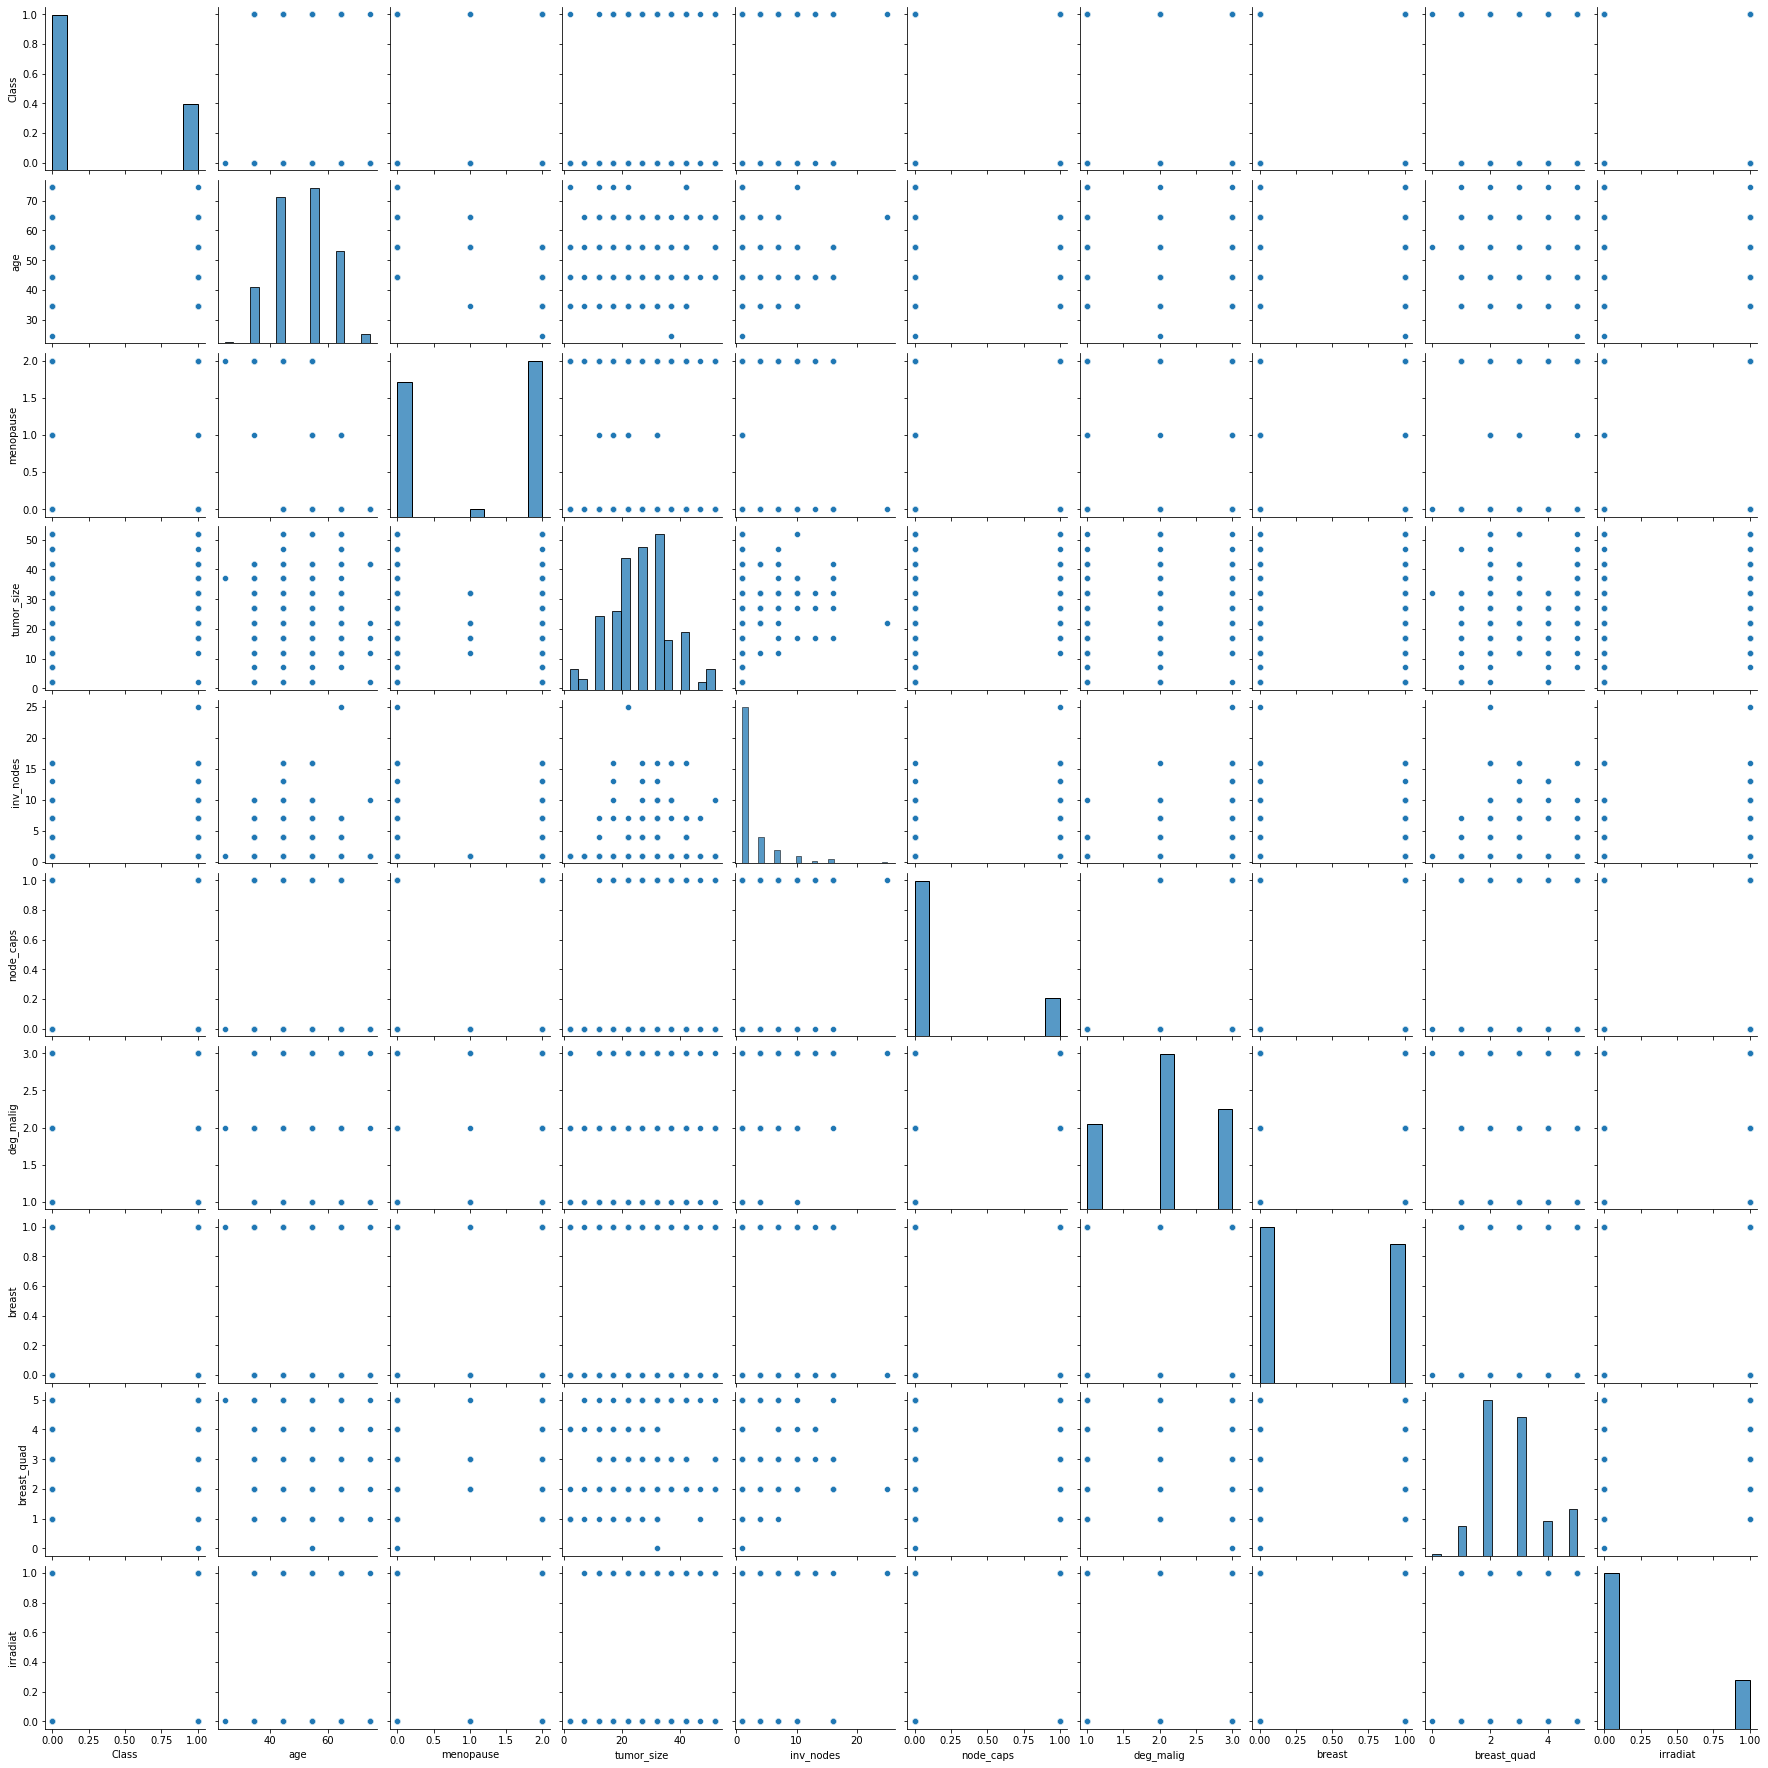

In [16]:
sns.pairplot(data)

- All columns are normally distributed except 'inv_nodes'
Lets check cp

Checking the correlation between the columns

In [17]:
data.corr()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
Class,1.000000,-0.075897,0.054770,0.176498,0.275144,0.275989,0.303457,-0.060927,0.035537,0.192887
age,-0.075897,1.000000,-0.719430,-0.007522,-0.037947,-0.057262,-0.079114,-0.047497,-0.054291,-0.045551
menopause,0.054770,-0.719430,1.000000,0.000772,-0.032595,0.036484,-0.047964,0.061345,0.095659,0.043687
tumor_size,0.176498,-0.007522,0.000772,1.000000,0.161479,0.205053,0.216500,0.051622,0.152025,0.165634
inv_nodes,0.275144,-0.037947,-0.032595,0.161479,1.000000,0.587517,0.332209,-0.027665,0.038017,0.323576
node_caps,0.275989,-0.057262,0.036484,0.205053,0.587517,1.000000,0.329268,-0.005835,0.068964,0.303283
deg_malig,0.303457,-0.079114,-0.047964,0.216500,0.332209,0.329268,1.000000,-0.048827,0.034380,0.211362
breast,-0.060927,-0.047497,0.061345,0.051622,-0.027665,-0.005835,-0.048827,1.000000,0.211861,0.016957
breast_quad,0.035537,-0.054291,0.095659,0.152025,0.038017,0.068964,0.034380,0.211861,1.000000,0.017020
irradiat,0.192887,-0.045551,0.043687,0.165634,0.323576,0.303283,0.211362,0.016957,0.017020,1.000000


<AxesSubplot:>

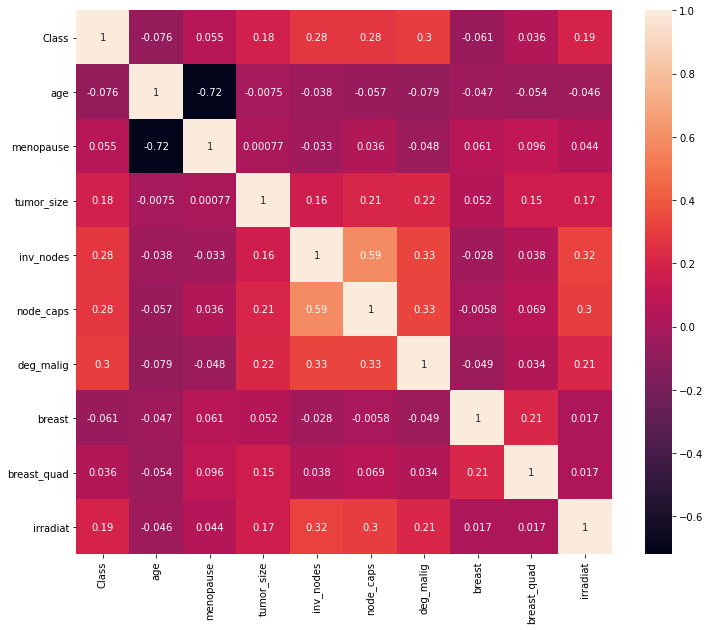

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

#### Normalising the numeric data

In [19]:

scale=StandardScaler()
for i in x:
    data[i]=scale.fit_transform(data[[i]])
    

##### Checking class distribution

<AxesSubplot:>

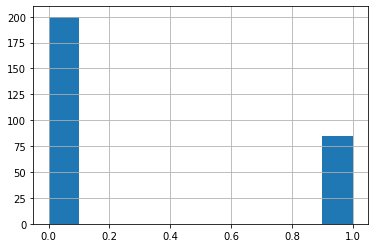

In [20]:
data.Class.hist()

- As we can see that class 0 is very high as compared to Class 1
- Need to balanced the class as it will create biasness
- So Using OVER SAMPLING technique to balanced the data

<AxesSubplot:>

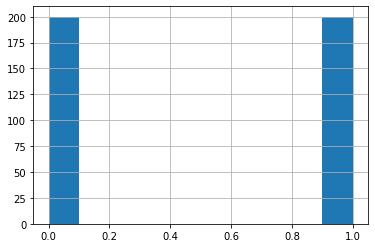

In [21]:
#Dividing target and rest variables
A=data.drop(['Class'],axis=1)
B=data['Class']
sampler=RandomOverSampler()
X,Y=sampler.fit_sample(A,B)
Y.hist()

Now Data looks Balanced

#### Spliting the train test data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

Making Classifer and Grid fucttion so that we can use it multple times

In [23]:
def Classifer(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    print(("Train accuracy: ", model.score(X_train, y_train))) ## Train accuracy
    print(("Test accuracy: ", model.score(X_test, y_test)))
    y_predict = model.predict(X_test)
    print('COFUSION MATRIX :\n',metrics.confusion_matrix(y_predict, y_test))
    print(metrics.classification_report(y_predict, y_test))
  

In [24]:
def Grid(model,X_train,X_test,y_train,y_test,para):
    model1=GridSearchCV(model, param_grid=para, n_jobs=-1,cv=5)
    Classifer(model1,X_train,X_test,y_train,y_test)
    print("Best Hyper Parameters:\n",model1.best_params_)

### Training Models

Using 4 Classifiers and lets compare them

#### Logistic Regression

In [25]:
Lr_model=LogisticRegression()

In [26]:
Classifer(Lr_model,X_train,X_test,y_train,y_test)

('Train accuracy: ', 0.6607142857142857)
('Test accuracy: ', 0.6583333333333333)
COFUSION MATRIX :
 [[43 21]
 [20 36]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        64
           1       0.63      0.64      0.64        56

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.66      0.66      0.66       120



#### KNN Classifier

In [27]:
knn_model= KNeighborsClassifier()
Classifer(knn_model,X_train,X_test,y_train,y_test)

('Train accuracy: ', 0.7857142857142857)
('Test accuracy: ', 0.675)
COFUSION MATRIX :
 [[40 16]
 [23 41]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        56
           1       0.72      0.64      0.68        64

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.67       120
weighted avg       0.68      0.68      0.68       120



#### KNN with Hyperparameter Tuning

In [28]:
para = {'n_neighbors':[i for i in range(3,12,2)],
          'leaf_size':[i for i in range(1,15,2)],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1] }
Grid(knn_model,X_train,X_test,y_train,y_test,para)

('Train accuracy: ', 0.9857142857142858)
('Test accuracy: ', 0.6833333333333333)
COFUSION MATRIX :
 [[34  9]
 [29 48]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        43
           1       0.84      0.62      0.72        77

    accuracy                           0.68       120
   macro avg       0.69      0.71      0.68       120
weighted avg       0.73      0.68      0.69       120

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}


#### Decision Tree Classifier

In [29]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=2,min_samples_split=3,random_state=12)
Classifer(dt_model,X_train,X_test,y_train,y_test)

('Train accuracy: ', 0.7071428571428572)
('Test accuracy: ', 0.675)
COFUSION MATRIX :
 [[48 24]
 [15 33]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        72
           1       0.58      0.69      0.63        48

    accuracy                           0.68       120
   macro avg       0.67      0.68      0.67       120
weighted avg       0.69      0.68      0.68       120



#### Decision Tree with Hyperparameter tuning

In [30]:
para = {'criterion': ['entropy','gini'],
        'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth': [4,5,6,7,8,9,10],
          'min_samples_split': [i for i in range(2,15,1)], 
          'min_samples_leaf':[i for i in range(2,15,1)],
        'random_state':[120]
       }
Grid(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,para)

('Train accuracy: ', 0.7857142857142857)
('Test accuracy: ', 0.7166666666666667)
COFUSION MATRIX :
 [[51 22]
 [12 35]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        73
           1       0.61      0.74      0.67        47

    accuracy                           0.72       120
   macro avg       0.71      0.72      0.71       120
weighted avg       0.73      0.72      0.72       120

Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 120}


#### Random Forest Classifier

In [31]:
Ran_model=RandomForestClassifier(n_estimators=50,min_samples_leaf=2,min_samples_split=3,random_state=100)
Classifer(Ran_model,X_train,X_test,y_train,y_test)

('Train accuracy: ', 0.9357142857142857)
('Test accuracy: ', 0.8333333333333334)
COFUSION MATRIX :
 [[51  8]
 [12 49]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        59
           1       0.86      0.80      0.83        61

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120



#### Random Forest with Hyperparameter tuning

In [32]:
para = {'criterion':['gini','entropy'],
          'n_estimators':[i for i in range(10,101,10)],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7],
         'n_jobs':[-1],
       }
Grid(RandomForestClassifier(),X_train,X_test,y_train,y_test,para)
        

('Train accuracy: ', 0.9821428571428571)
('Test accuracy: ', 0.8083333333333333)
COFUSION MATRIX :
 [[47  7]
 [16 50]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        54
           1       0.88      0.76      0.81        66

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.82      0.81      0.81       120

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20, 'n_jobs': -1}


### Finding important feature

In [35]:
final_model= RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 2, n_estimators = 20, random_state=120,n_jobs= -1)
final_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=120)

<AxesSubplot:>

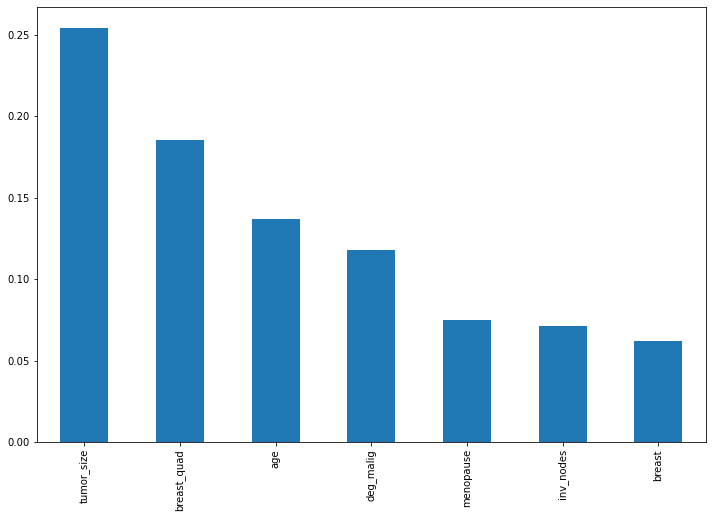

In [36]:
plt.figure(figsize=(12,8))
imp=pd.Series(final_model.feature_importances_,index=X.columns)
imp.nlargest(7).plot(kind='bar')

## Conclusion

By Comparing the Accuracy and the classification report of all the Classifer, we have come up with a Best Classifier which is Random Forest Classifier with a
- Accuracy: 81%
- Less False Negative and False Positive as compared to other
- Better Precision , Recall and F-score
- Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20, 'n_jobs': -1}
 - Most important feature is tumor_size followed by breast_quad, age, deg_maling